In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)

In [5]:
df = pd.read_csv('tested.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [6]:
l = ['Name', 'Ticket', 'Cabin']

In [7]:
df1 = df.drop(l, axis = 'columns')
df1

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,male,34.5,0,0,7.8292,Q
1,893,1,3,female,47.0,1,0,7.0000,S
2,894,0,2,male,62.0,0,0,9.6875,Q
3,895,0,3,male,27.0,0,0,8.6625,S
4,896,1,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...,...
413,1305,0,3,male,NaN,0,0,8.0500,S
414,1306,1,1,female,39.0,0,0,108.9000,C
415,1307,0,3,male,38.5,0,0,7.2500,S
416,1308,0,3,male,NaN,0,0,8.0500,S


## Handling NaN values

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Fare         417 non-null    float64
 8   Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 29.5+ KB


In [9]:
df1.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

In [12]:
df1.groupby('Pclass')['Age'].median()

Pclass
1    42.0
2    26.5
3    24.0
Name: Age, dtype: float64

In [20]:
p1 = df1.Age[df1.Pclass == 1].mean()
p2 = df1.Age[df1.Pclass == 2].mean()
p3 = df1.Age[df1.Pclass == 3].mean()

In [21]:
print(p1,p2,p3)

40.91836734693877 28.7775 24.02794520547945


C:\Users\rohan\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

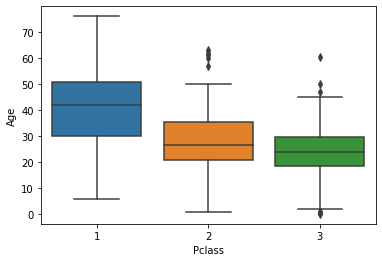

In [16]:
sns.boxplot(df1.Pclass, df1.Age)

In [22]:
df1.Age[df1.Pclass == 1] = df1.Age[df1.Pclass == 1].fillna(p1)
df1.Age[df1.Pclass == 2] = df1.Age[df1.Pclass == 2].fillna(p1)
df1.Age[df1.Pclass == 3] = df1.Age[df1.Pclass == 3].fillna(p1)

C:\Users\rohan\AppData\Local\Temp\ipykernel_4472\2211859784.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.Age[df1.Pclass == 1] = df1.Age[df1.Pclass == 1].fillna(p1)
C:\Users\rohan\AppData\Local\Temp\ipykernel_4472\2211859784.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.Age[df1.Pclass == 2] = df1.Age[df1.Pclass == 2].fillna(p1)
C:\Users\rohan\AppData\Local\Temp\ipykernel_4472\2211859784.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

In [23]:
df1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
dtype: int64

In [26]:
df1[df1.Fare.isnull()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
152,1044,0,3,male,60.5,0,0,NaN,S


In [27]:
df1.Fare = df1.Fare.fillna(df1.Fare[df1.Pclass == 3].mean())
df1.loc[152]

PassengerId         1044
Survived               0
Pclass                 3
Sex                 male
Age                 60.5
SibSp                  0
Parch                  0
Fare           12.459678
Embarked               S
Name: 152, dtype: object

In [28]:
df1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [29]:
df1

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,male,34.500000,0,0,7.8292,Q
1,893,1,3,female,47.000000,1,0,7.0000,S
2,894,0,2,male,62.000000,0,0,9.6875,Q
3,895,0,3,male,27.000000,0,0,8.6625,S
4,896,1,3,female,22.000000,1,1,12.2875,S
...,...,...,...,...,...,...,...,...,...
413,1305,0,3,male,40.918367,0,0,8.0500,S
414,1306,1,1,female,39.000000,0,0,108.9000,C
415,1307,0,3,male,38.500000,0,0,7.2500,S
416,1308,0,3,male,40.918367,0,0,8.0500,S


In [33]:
p = []
for i in df1.Pclass:
    x = str(i)
    p.append(x)
p

['3',
 '3',
 '2',
 '3',
 '3',
 '3',
 '3',
 '2',
 '3',
 '3',
 '3',
 '1',
 '1',
 '2',
 '1',
 '2',
 '2',
 '3',
 '3',
 '3',
 '1',
 '3',
 '1',
 '1',
 '1',
 '3',
 '1',
 '3',
 '1',
 '3',
 '2',
 '2',
 '3',
 '3',
 '1',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '1',
 '3',
 '2',
 '1',
 '3',
 '1',
 '3',
 '1',
 '3',
 '1',
 '2',
 '2',
 '1',
 '2',
 '3',
 '3',
 '3',
 '3',
 '1',
 '3',
 '2',
 '3',
 '3',
 '1',
 '2',
 '3',
 '1',
 '1',
 '1',
 '3',
 '3',
 '3',
 '1',
 '1',
 '1',
 '3',
 '1',
 '2',
 '3',
 '3',
 '1',
 '1',
 '3',
 '2',
 '3',
 '3',
 '3',
 '3',
 '2',
 '3',
 '3',
 '1',
 '3',
 '1',
 '3',
 '1',
 '3',
 '3',
 '3',
 '1',
 '2',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '2',
 '2',
 '3',
 '1',
 '3',
 '1',
 '3',
 '3',
 '3',
 '1',
 '2',
 '2',
 '3',
 '1',
 '3',
 '3',
 '3',
 '3',
 '3',
 '2',
 '3',
 '3',
 '1',
 '3',
 '3',
 '3',
 '3',
 '3',
 '2',
 '3',
 '3',
 '3',
 '1',
 '1',
 '2',
 '1',
 '3',
 '1',
 '3',
 '1',
 '2',
 '1',
 '3',
 '3',
 '3',
 '3',
 '3',
 '1',
 '3',
 '1',
 '3',
 '3',
 '3',
 '2',
 '3',
 '2',
 '3',
 '1'

In [34]:
df1.Pclass = p
df1

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,male,34.500000,0,0,7.8292,Q
1,893,1,3,female,47.000000,1,0,7.0000,S
2,894,0,2,male,62.000000,0,0,9.6875,Q
3,895,0,3,male,27.000000,0,0,8.6625,S
4,896,1,3,female,22.000000,1,1,12.2875,S
...,...,...,...,...,...,...,...,...,...
413,1305,0,3,male,40.918367,0,0,8.0500,S
414,1306,1,1,female,39.000000,0,0,108.9000,C
415,1307,0,3,male,38.500000,0,0,7.2500,S
416,1308,0,3,male,40.918367,0,0,8.0500,S


In [36]:
df2 = pd.get_dummies(df1)
df2

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,0,34.500000,0,0,7.8292,0,0,1,0,1,0,1,0
1,893,1,47.000000,1,0,7.0000,0,0,1,1,0,0,0,1
2,894,0,62.000000,0,0,9.6875,0,1,0,0,1,0,1,0
3,895,0,27.000000,0,0,8.6625,0,0,1,0,1,0,0,1
4,896,1,22.000000,1,1,12.2875,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,40.918367,0,0,8.0500,0,0,1,0,1,0,0,1
414,1306,1,39.000000,0,0,108.9000,1,0,0,1,0,1,0,0
415,1307,0,38.500000,0,0,7.2500,0,0,1,0,1,0,0,1
416,1308,0,40.918367,0,0,8.0500,0,0,1,0,1,0,0,1


In [37]:
li = ['Pclass_1', 'Sex_female', 'Embarked_C']

In [38]:
df3 = df2.drop(li, axis = 'columns')
df3

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,892,0,34.500000,0,0,7.8292,0,1,1,1,0
1,893,1,47.000000,1,0,7.0000,0,1,0,0,1
2,894,0,62.000000,0,0,9.6875,1,0,1,1,0
3,895,0,27.000000,0,0,8.6625,0,1,1,0,1
4,896,1,22.000000,1,1,12.2875,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,40.918367,0,0,8.0500,0,1,1,0,1
414,1306,1,39.000000,0,0,108.9000,0,0,0,0,0
415,1307,0,38.500000,0,0,7.2500,0,1,1,0,1
416,1308,0,40.918367,0,0,8.0500,0,1,1,0,1


In [39]:
x = df3.drop('Survived', axis = 'columns')
y = df3.Survived

## Train Test Split

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 10)
len(x_train)

334

In [41]:
len(x_test)

84

## Model Selection

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [50]:
model = {
    'lr':{
        'model':LogisticRegression(),
        'params':{
            'C':[1]
        }
    },
    'DT':{
        'model':DecisionTreeClassifier(),
        'params':{
            'max_features':[None]
        }
    },
    'RF':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[50,100,150,200,250,300]
        }
    }
}

In [53]:
from sklearn.model_selection import GridSearchCV
mod = []
for md, mdl in model.items():
    gs = GridSearchCV(mdl['model'], mdl['params'], cv = 5)
    gs.fit(x, y)
    
    m = {
        'name': md,
        'best_score':gs.best_score_,
        'best_params': gs.best_params_
    }
    mod.append(m)

C:\Users\rohan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rohan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

In [55]:
pd.DataFrame(mod, columns = ['name', 'best_score', 'best_params'])

,name,best_score,best_params
0,lr,1.0,{'C': 1}
1,DT,1.0,{'max_features': None}
2,RF,1.0,{'n_estimators': 50}


In [56]:
lr = LogisticRegression(C = 1)

In [57]:
lr.fit(x_train, y_train)

C:\Users\rohan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1)

In [58]:
lr.score(x_test, y_test)

1.0